<a href="https://colab.research.google.com/github/musawu/ObjectDetection/blob/main/ObjectDetectionyl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install YOLO

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 5.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8x.pt")

100%|██████████| 131M/131M [00:00<00:00, 272MB/s]


In [ ]:
result = model.predict("/content/cat&dog.jpeg")


image 1/1 /content/cat&dog.jpeg: 448x640 1 cat, 1 dog, 3394.7ms
Speed: 19.5ms preprocess, 3394.7ms inference, 37.6ms postprocess per image at shape (1, 3, 448, 640)


In [ ]:
print(result)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58

In [ ]:
res= result[0]


In [ ]:
len(res.boxes)

2

In [ ]:
box = res.boxes[0]
box

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.engine.results.Boxes object with attributes:

boxes: tensor([[310.9379, 223.8805, 438.0217, 563.7512,   0.9372,  15.0000]])
cls: tensor([15.])
conf: tensor([0.9372])
data: tensor([[310.9379, 223.8805, 438.0217, 563.7512,   0.9372,  15.0000]])
id: None
is_track: False
orig_shape: (682, 1024)
shape: torch.Size([1, 6])
xywh: tensor([[374.4798, 393.8158, 127.0838, 339.8707]])
xywhn: tensor([[0.3657, 0.5774, 0.1241, 0.4983]])
xyxy: tensor([[310.9379, 223.8805, 438.0217, 563.7512]])
xyxyn: tensor([[0.3037, 0.3283, 0.4278, 0.8266]])

In [ ]:
print("Object type: ",box.cls)
print("Coordinates: ",box.xyxy)
print("Probability: ",box.conf)

Object type:  tensor([15.])
Coordinates:  tensor([[310.9379, 223.8805, 438.0217, 563.7512]])
Probability:  tensor([0.9372])


In [ ]:
# Here, i am getting the value out of the array

print("Object type: ",box.cls[0])
print("Coordinates: ",box.xyxy[0])
print("Probability: ",box.conf[0])

Object type:  tensor(15.)
Coordinates:  tensor([310.9379, 223.8805, 438.0217, 563.7512])
Probability:  tensor(0.9372)


In [ ]:
# .item to return the key, .tolist to return the cordinate, .item to return the confidence level


cords = box.xyxy[0].tolist()
class_id = box.cls[0].item()
conf = box.conf[0].item()
print("Object type: ",class_id)
print("Coordinates: ",cords)
print("Probability: ",conf)

Object type:  15.0
Coordinates:  [310.9378967285156, 223.88046264648438, 438.02166748046875, 563.7511596679688]
Probability:  0.9371841549873352


In [ ]:
# It will return all the object names inside yolo
print(res.names)

cat


In [ ]:
cords = box.xyxy[0].tolist()
cords = [round(x) for x in cords]
class_id = res.names[box.cls[0].item()]
conf = round(box.conf[0].item(),2)
print("Object type: ",class_id)
print("Coordinates: ",cords)
print("Probability: ",conf)

Object type:  cat
Coordinates:  [311, 224, 438, 564]
Probability:  0.94


In [ ]:
for box in res.boxes:
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  class_id = res.names[box.cls[0].item()]
  conf = round(box.conf[0].item(),2)
  print("Object type: ",class_id)
  print("Coordinates: ",cords)
  print("Probability: ",conf)


Object type:  cat
Coordinates:  [311, 224, 438, 564]
Probability:  0.94
Object type:  dog
Coordinates:  [394, 135, 795, 612]
Probability:  0.84


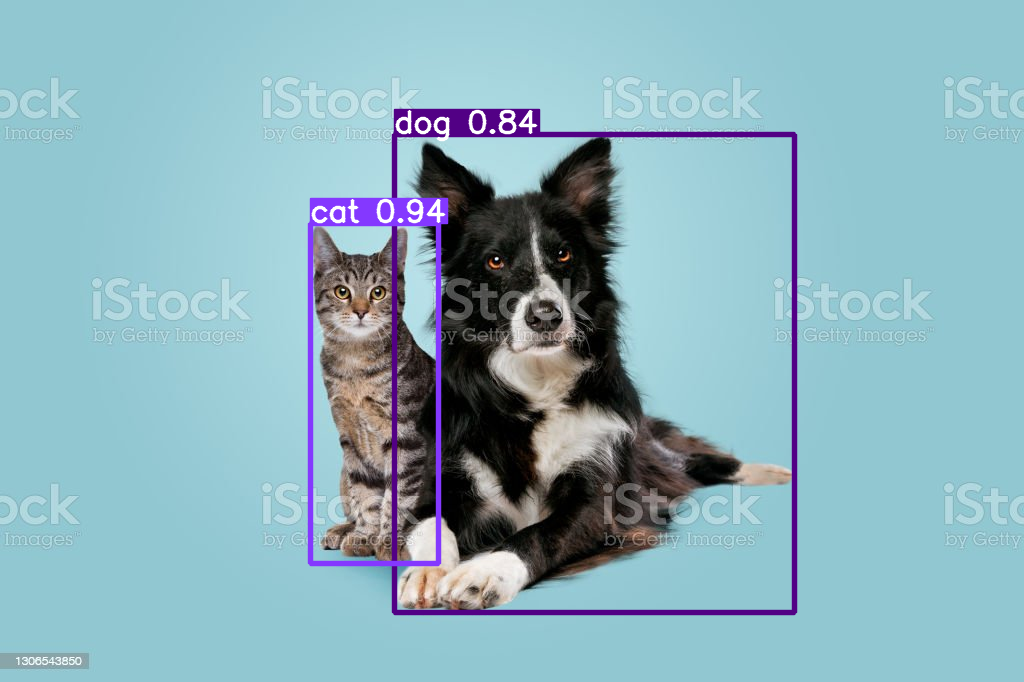

In [ ]:
from PIL import Image
Image.fromarray(res.plot()[:,:,::-1])